Liste des types de POI furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar


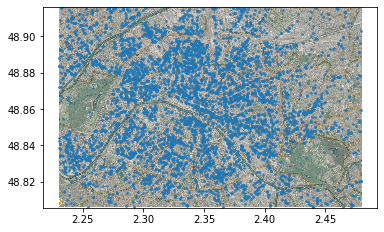

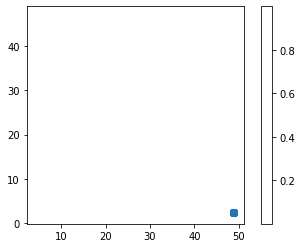

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


plt.ion()
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')

## coordonnees GPS de la carte
xmin,xmax = 2.23,2.48   ## coord_x min et max
ymin,ymax = 48.806,48.916 ## coord_y min et max

def show_map():
    plt.imshow(parismap,extent=[xmin,xmax,ymin,ymax],aspect=1.5)
    ## extent pour controler l'echelle du plan

poidata = pickle.load(open("data/poi-paris.pkl","rb"))
## liste des types de point of interest (poi)
print("Liste des types de POI" , ", ".join(poidata.keys()))

## Choix d'un poi
typepoi = "bar"

## Creation de la matrice des coordonnees des POI
geo_mat = np.zeros((len(poidata[typepoi]),2))
for i,(k,v) in enumerate(poidata[typepoi].items()):
    geo_mat[i,:]=v[0]

## Affichage brut des poi
show_map()
## alpha permet de regler la transparence, s la taille
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.8,s=3)


###################################################

# discretisation pour l'affichage des modeles d'estimation de densite
steps = 100
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]

# A remplacer par res = monModele.predict(grid).reshape(steps,steps)
res = np.random.random((steps,steps))
plt.figure()
show_map()
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0,origin = "lower")
plt.colorbar()
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.3)


In [3]:

import googlemaps as gmaps

APIKEY = ""

gm = gmaps.Client(APIKEY)

COORD = [(48.806,2.23),(48.916,2.48)]


DX = COORD[1][0]-COORD[0][0]
DY = COORD[1][1]-COORD[0][1]
TYPES = ["clothing_store", "bar","laundry","bakery", "lodging", "restaurant","cafe", "atm", "night_club","convenience_store","furniture_store","home_goods_store"]
cpt = 0

def get_list(typreq,totstep):
    res = dict()
    global cpt
    for i in range(totstep):
        for j in range(totstep):
            cpt+=1
            coord = (COORD[0][0]+i*DX*1./totstep,COORD[0][1]+j*DY*1./totstep)
            print(typreq,i,j,len(res),cpt)
            res.update([ (x['place_id'],(x['geometry']['location']['lat'],x['geometry']['location']['lng'])) for x in gm.places_radar(coord, 2000, type=typreq)['results']])
    return res

def treat_dic(d):
    global cpt
    for i,(k,v) in enumerate(d.items()):
        print(i,len(d),cpt)
        res=gm.place(k)['result']
        cpt+=1
        d[k]=(v,res.get('rating',-1),res.get('name',""),res.get('types',[]),res.get('price_level',-1))
    return d
res = dict()
for typreq in TYPES:
    res[typreq] = get_list(typreq,20)
    pickle.dump(res[typreq],open("res"+typreq+".pkl","wb"))

for typreq in TYPES:
    res[typreq]=treat_dic(res[typreq])
    pickle.dump(res[typreq],open("rescomplet"+typreq+".pkl","wb"))
pickle.dump(res,open("restotal.pkl","wb"))


ModuleNotFoundError: No module named 'googlemaps'

Dans la prochaine cellule, nous utiliserons l'approche des histogrames de densité.